In [1]:
# import package
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# get the path of train and test.
train_path='/opt/day2/train_jsrt/'
test_path='/opt/day2/test_jsrt/'
print('number of train image{},number of test image{}'.format(len(os.listdir(train_path))/2,
                                                                  len(os.listdir(test_path))/2) )

number of train image200.0,number of test image47.0


In [12]:
# import csv
# def get_csv(base_path,output):
#     with open(output,'a') as csvfile:
#         headers=['image','mask']
#         writer = csv.DictWriter(csvfile, delimiter=',', lineterminator='\n',fieldnames=headers) 
#         writer.writeheader()
#         if not os.path.isfile(output):
#             writer.writeheader()  # file doesn't exist yet, write a header
        
#         file_list=sorted(os.listdir(base_path))
#         for file_name in file_list:
#             if 'mask' in file_name :
#                 writer.writerow({'image':os.path.join(base_path,file_name_img),'mask':os.path.join(base_path,file_name)}) 
#             else:
#                  file_name_img=file_name
#         print('recording done for {}'.format(base_path))


# get_csv(train_path,output='./fengkai/Lung_train.csv')    
# get_csv(test_path,output='./fengkai/Lung_test.csv')   

recording done for /opt/day2/train_jsrt/
recording done for /opt/day2/test_jsrt/


In [11]:
# since tensorflow doesn't have tiff decoder, I will convert it to tfREcord here-

from PIL import Image
import numpy as np
import skimage.io as io

import csv

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


# Let's collect the real images to later on compare
# to the reconstructed ones
def to_binary(train_csv,tfrecords_filename):
    writer = tf.python_io.TFRecordWriter(tfrecords_filename)
    original_images = []
    imageReader = csv.reader(open(train_csv), delimiter=',')
    #skin header
    next(imageReader)
    iter=0
    for row in imageReader:
    
        img_path,mask_path=row
#         print(img_path,mask_path)
        img = np.array(Image.open(img_path))
        mask = np.array(Image.open(mask_path))
        height = img.shape[0]
        width = img.shape[1]
         # Put in the original images into array
        # Just for future check for correctness
        original_images.append((img, mask))
        img_raw = img.tostring()
        mask_raw = mask.tostring()

        example = tf.train.Example(features=tf.train.Features(feature={
        'height': _int64_feature(height),
        'width': _int64_feature(width),
        'image_raw': _bytes_feature(img_raw),
        'mask_raw': _bytes_feature(mask_raw)}))

        writer.write(example.SerializeToString())
        iter+=1
    writer.close()
    print('conversion done with{} '.format(iter))
# train binary file generate
tfrecords_filename = './fengkai/lung_training.tfrecords'
train_csv= './fengkai/Lung_train.csv'
to_binary(train_csv,tfrecords_filename)
# test binary file generate
tfrecords_filename = './fengkai/lung_testing.tfrecords'
train_csv= './fengkai/Lung_test.csv'
to_binary(train_csv,tfrecords_filename)

conversion done with200 
conversion done with47 


255.0 255.0


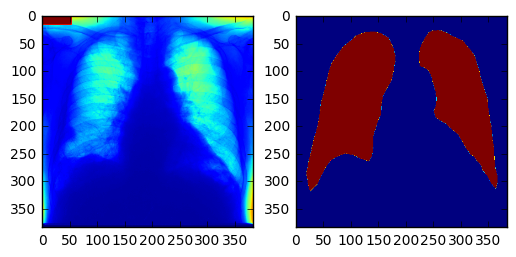

255.0 255.0


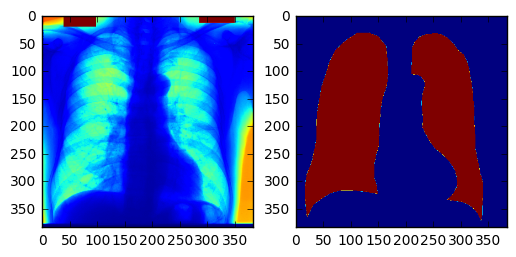

255.0 255.0


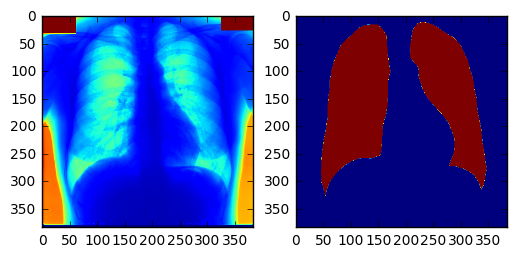

255.0 255.0


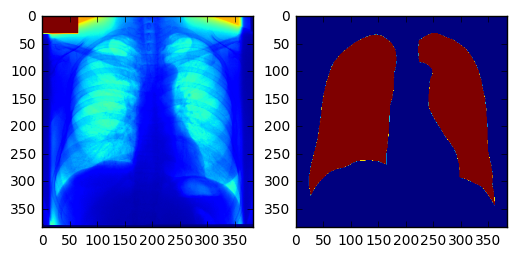

255.0 255.0


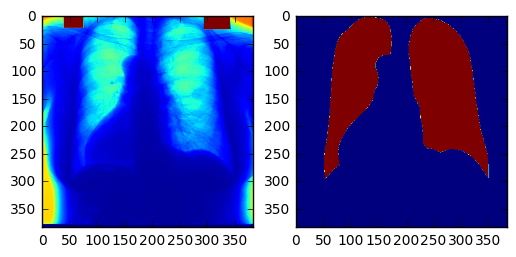

255.0 255.0


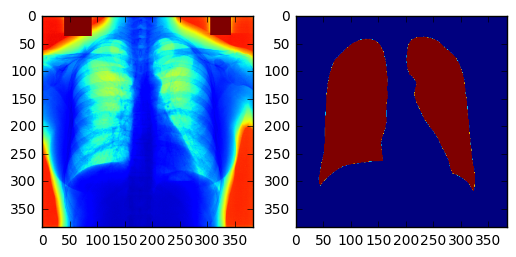

255.0 255.0


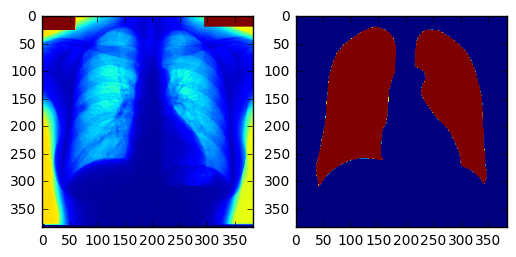

255.0 255.0


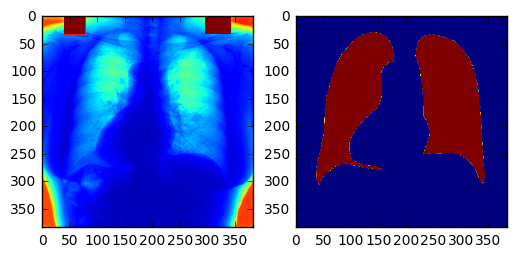

255.0 255.0


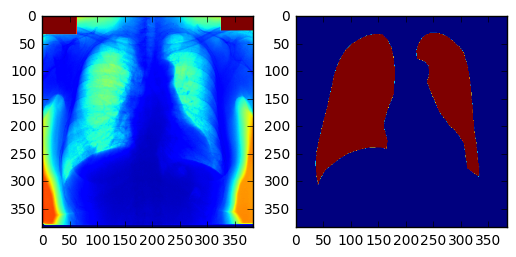

255.0 255.0


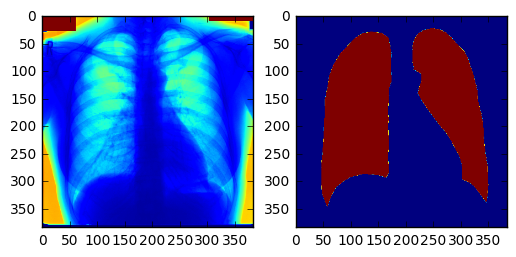

255.0 255.0


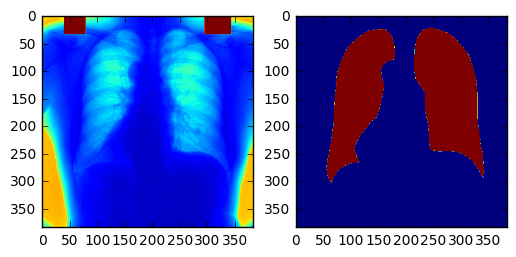

255.0 255.0


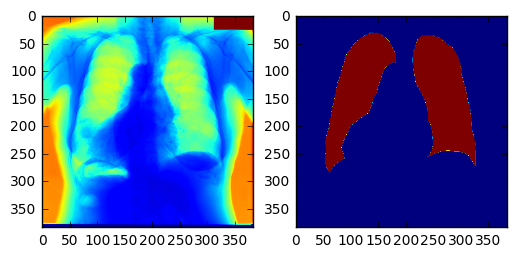

255.0 255.0


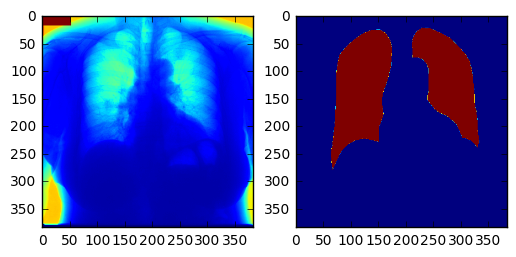

255.0 255.0


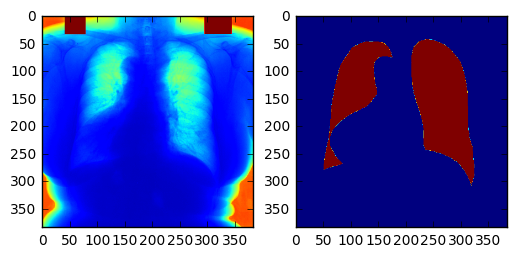

255.0 255.0


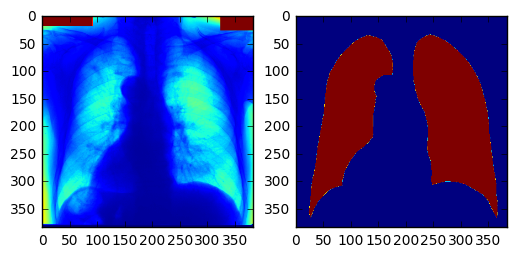

255.0 255.0


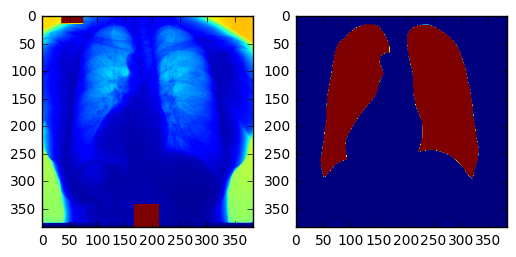

255.0 255.0


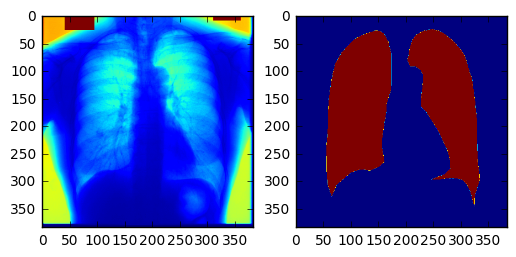

255.0 255.0


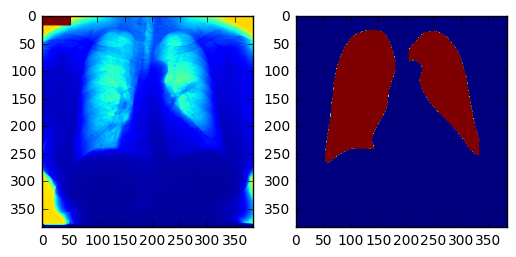

255.0 255.0


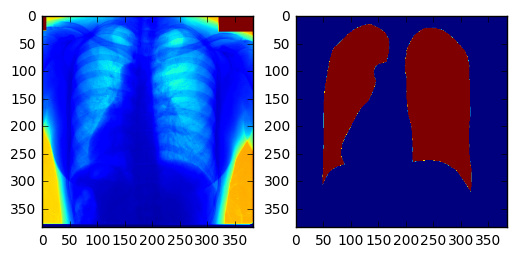

255.0 255.0


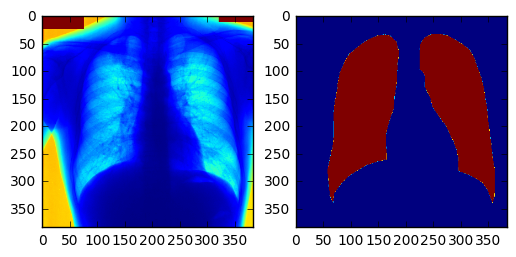

255.0 255.0


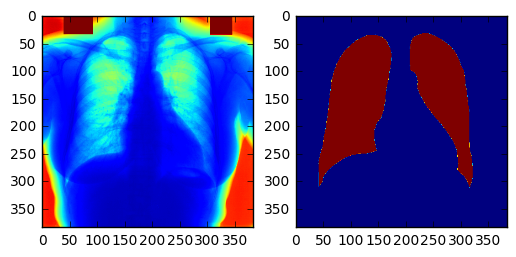

249.0 255.0


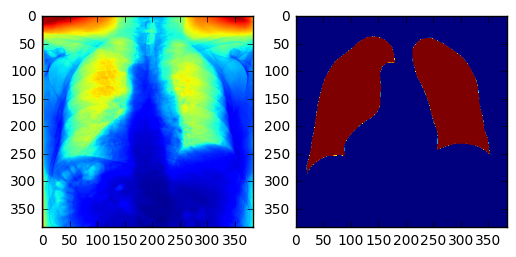

235.333 255.0


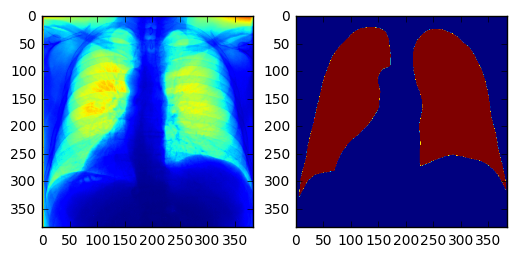

255.0 255.0


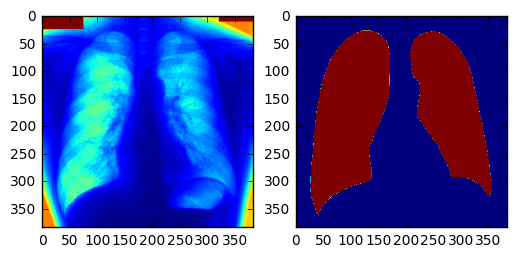

255.0 255.0


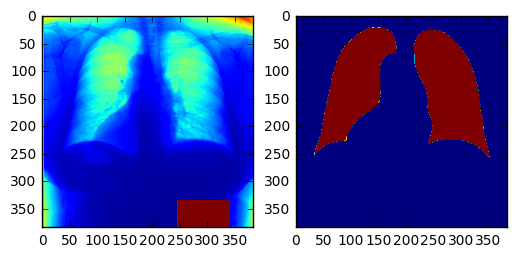

255.0 255.0


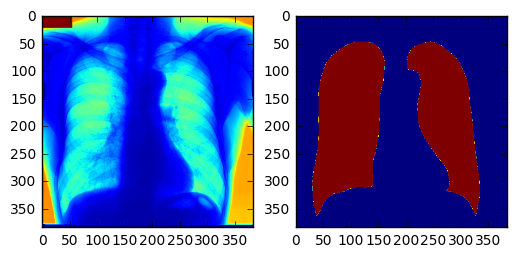

255.0 255.0


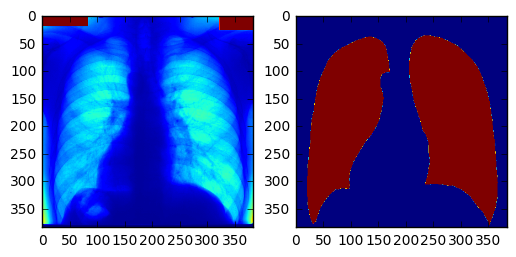

255.0 255.0


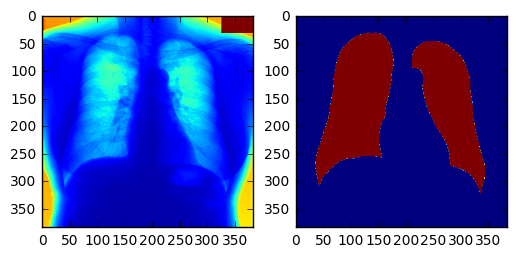

255.0 255.0


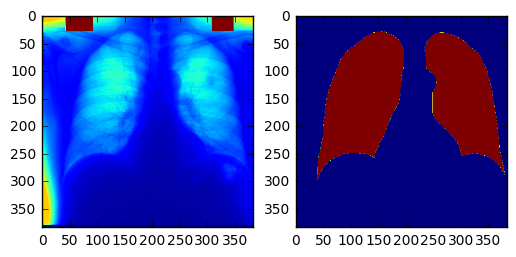

255.0 255.0


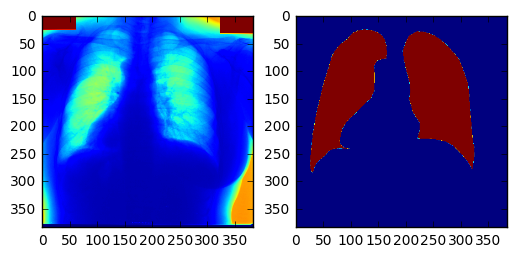

255.0 255.0


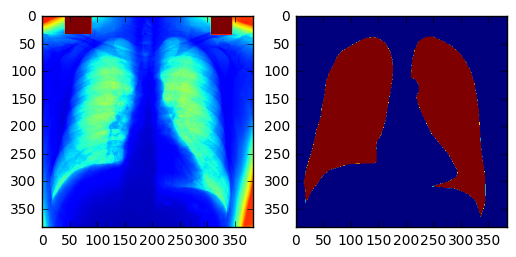

255.0 255.0


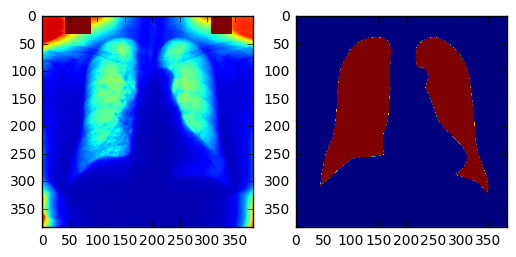

255.0 255.0


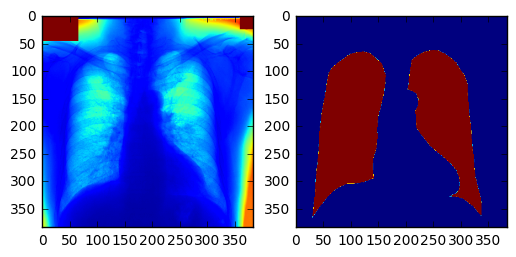

255.0 255.0


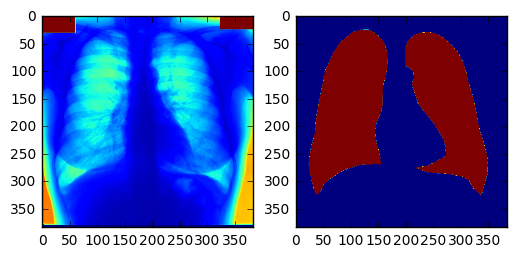

255.0 255.0


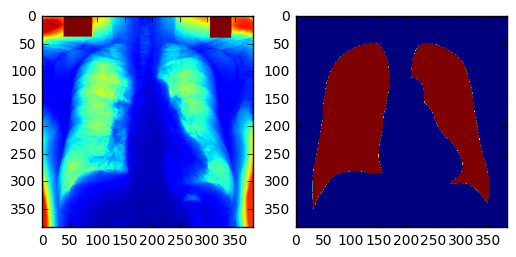

237.667 255.0


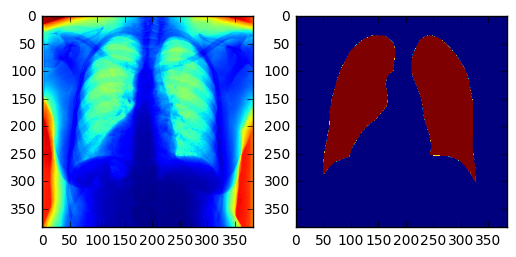

255.0 255.0


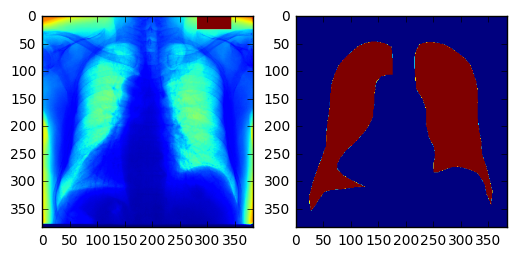

255.0 255.0


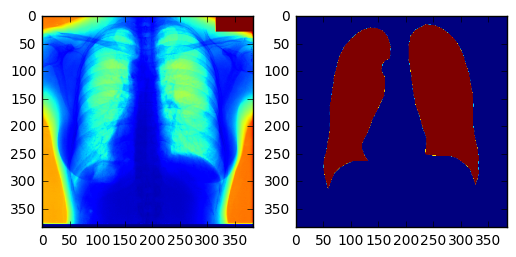

255.0 255.0


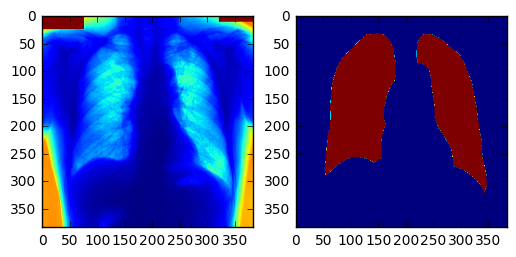

255.0 255.0


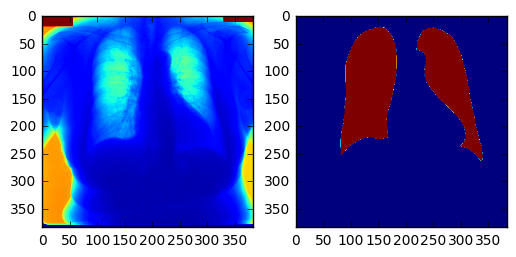

255.0 255.0


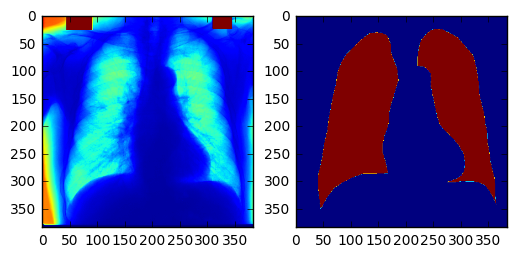

255.0 255.0


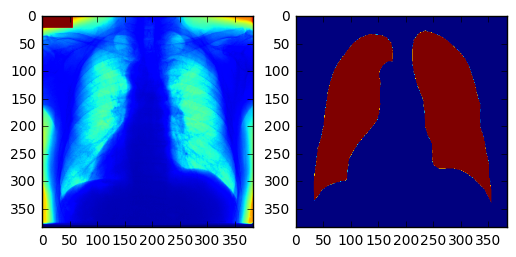

255.0 255.0


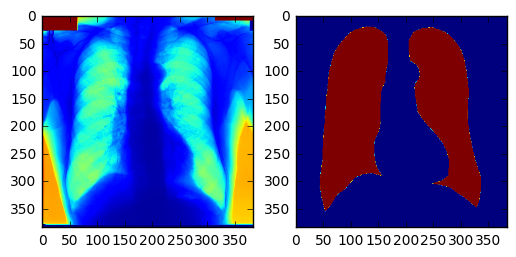

255.0 255.0


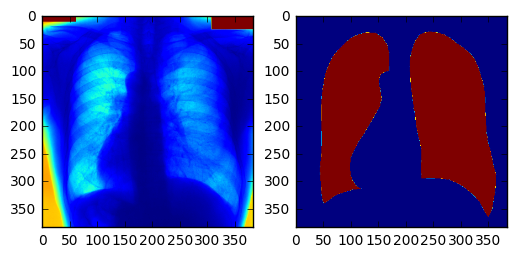

255.0 255.0


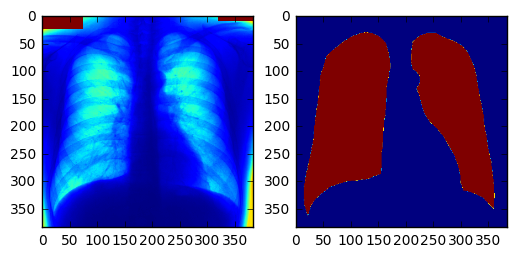

255.0 255.0


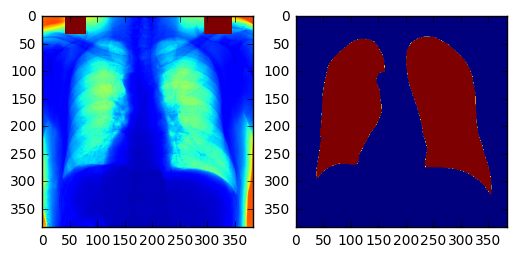

255.0 255.0


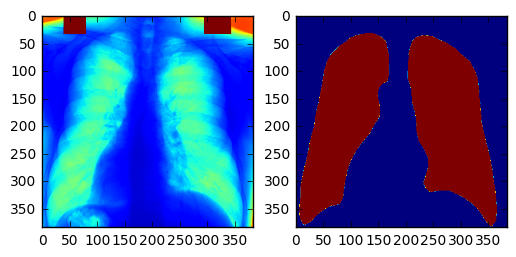

255.0 255.0


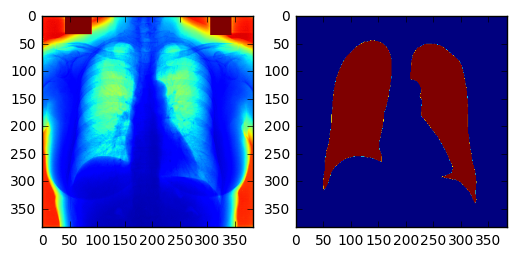

255.0 255.0


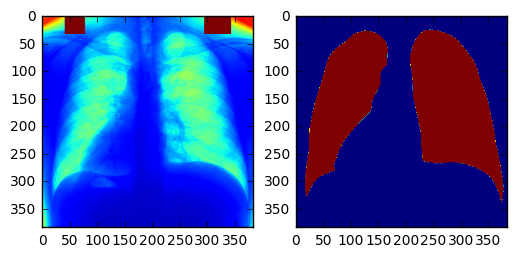

255.0 255.0


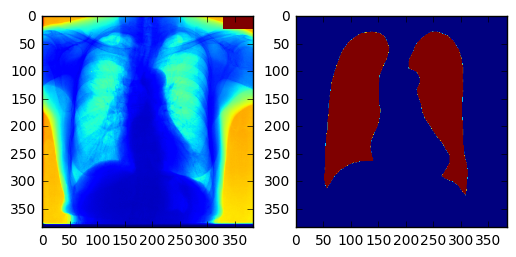

255.0 255.0


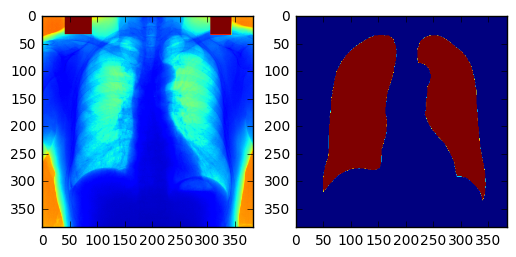

255.0 255.0


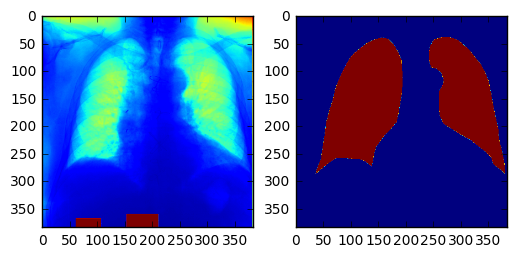

248.667 255.0


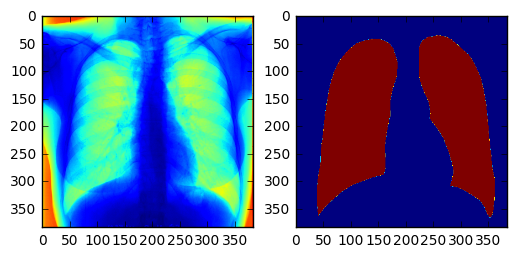

255.0 255.0


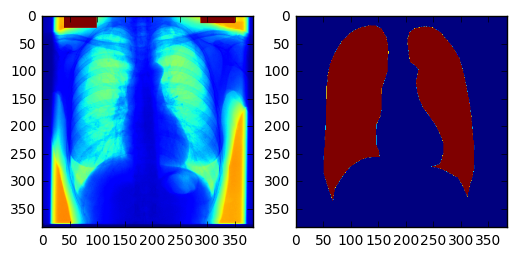

255.0 255.0


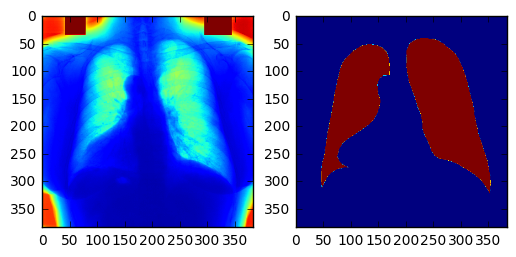

255.0 255.0


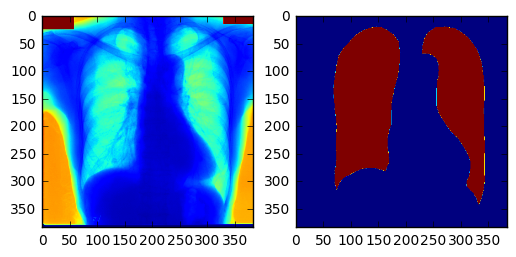

255.0 255.0


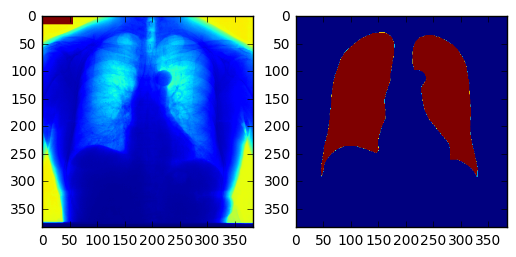

255.0 255.0


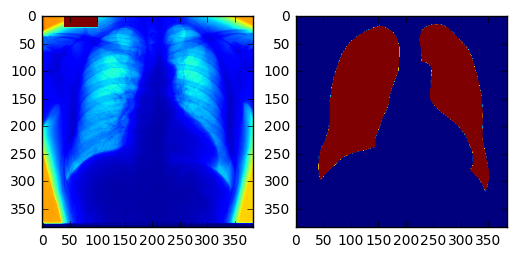

255.0 255.0


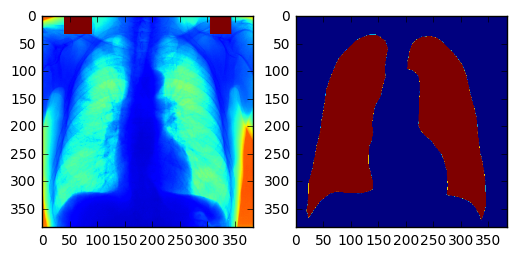

255.0 255.0


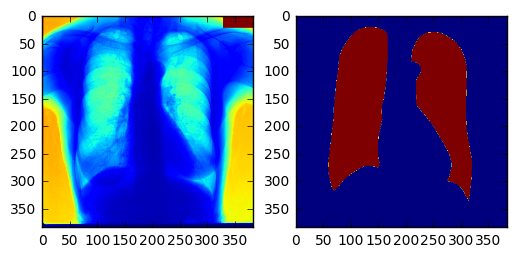

255.0 255.0


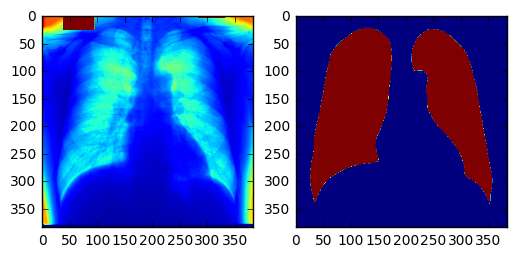

247.222 255.0


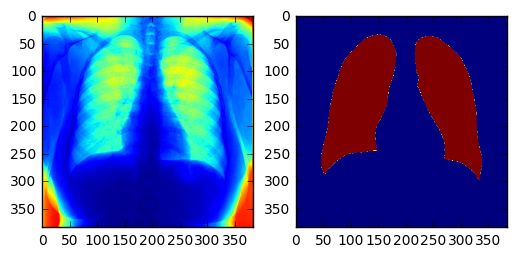

255.0 255.0


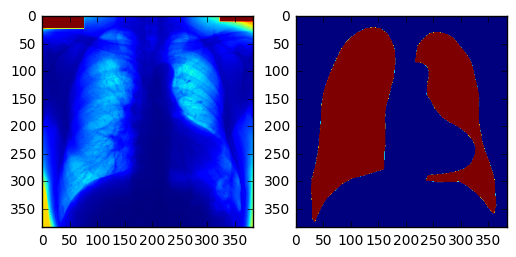

255.0 255.0


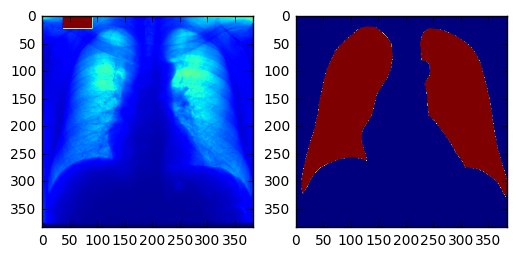

255.0 255.0


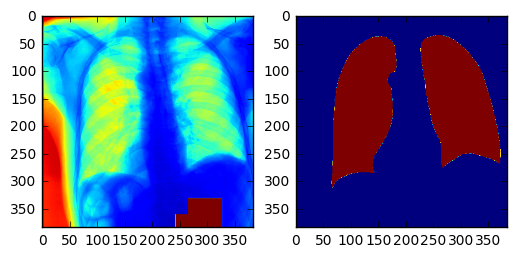

255.0 255.0


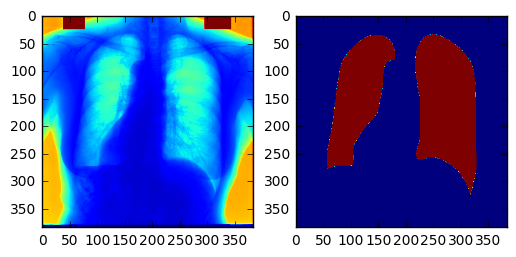

255.0 255.0


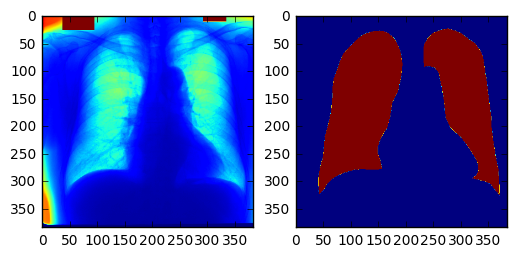

255.0 255.0


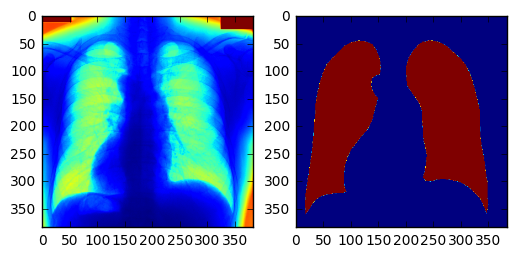

255.0 255.0


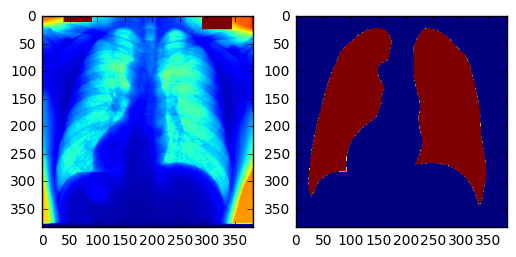

255.0 255.0


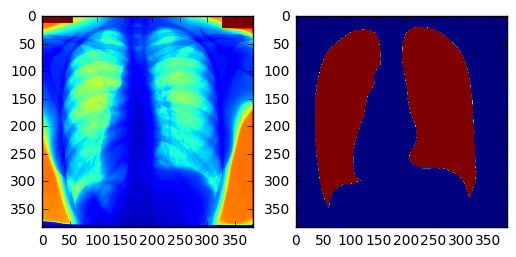

255.0 255.0


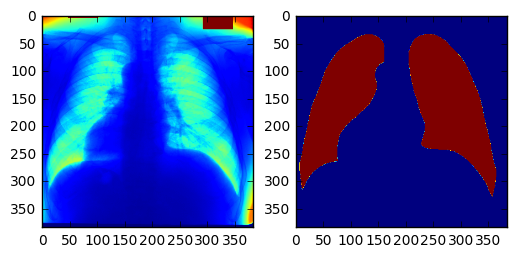

255.0 255.0


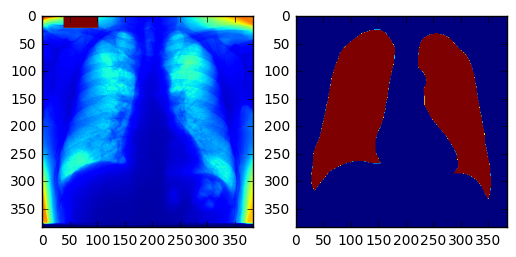

255.0 255.0


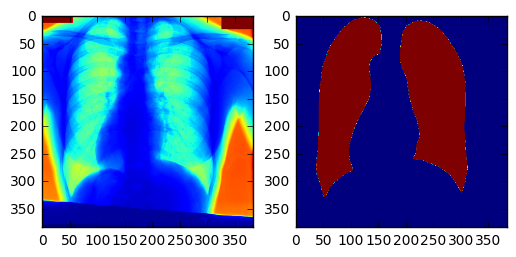

255.0 255.0


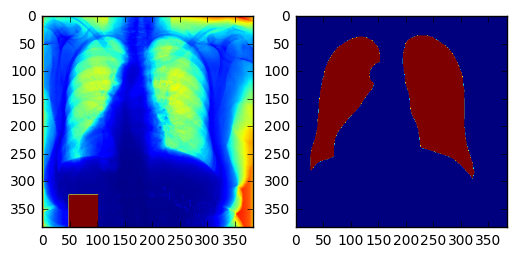

255.0 255.0


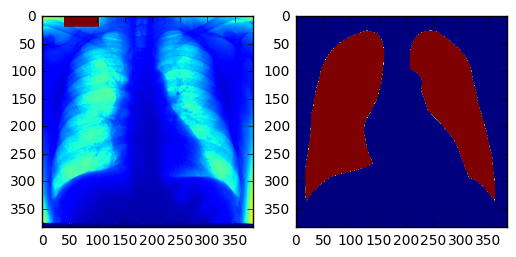

255.0 255.0


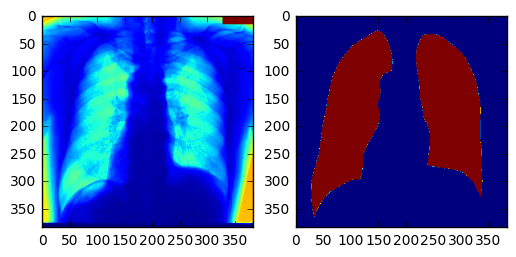

255.0 255.0


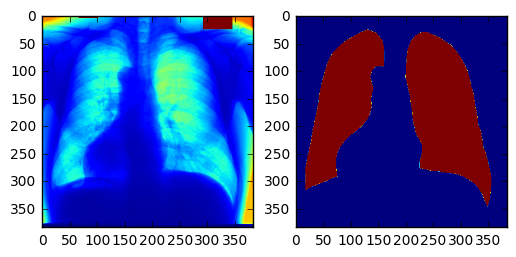

255.0 255.0


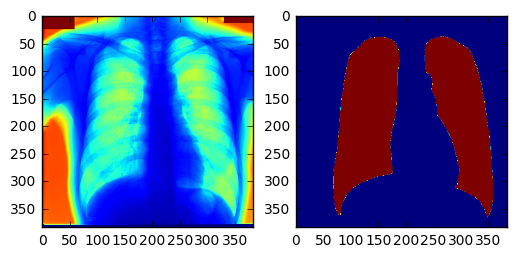

255.0 255.0


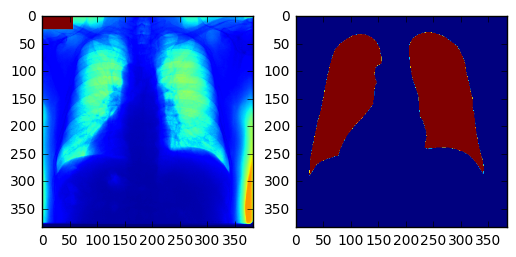

255.0 255.0


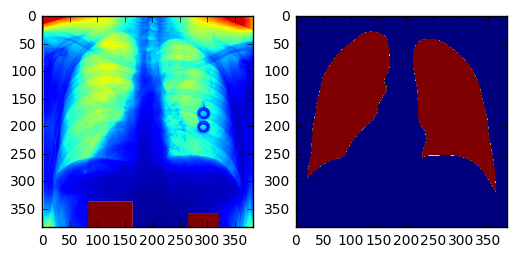

255.0 255.0


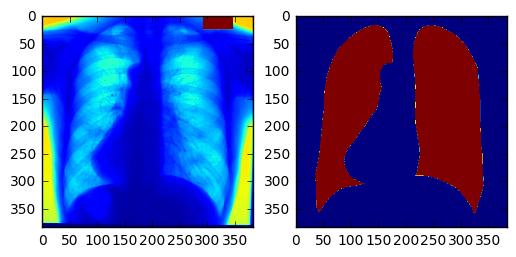

255.0 255.0


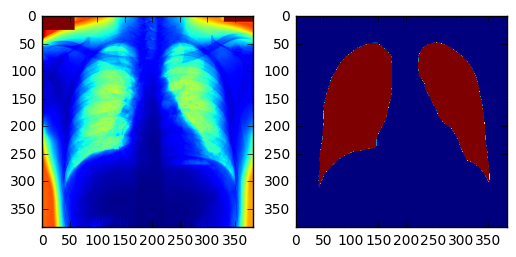

255.0 255.0


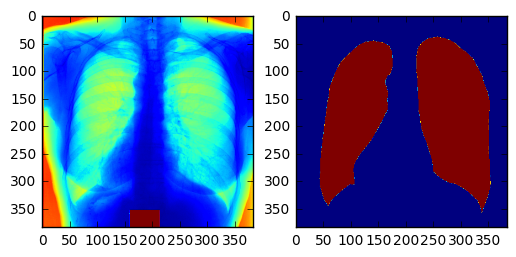

255.0 255.0


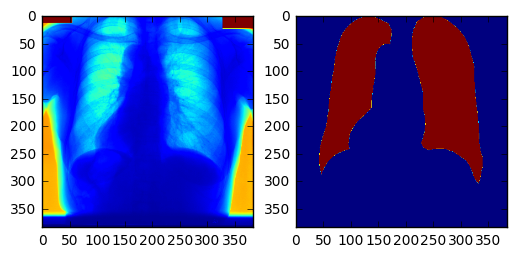

255.0 255.0


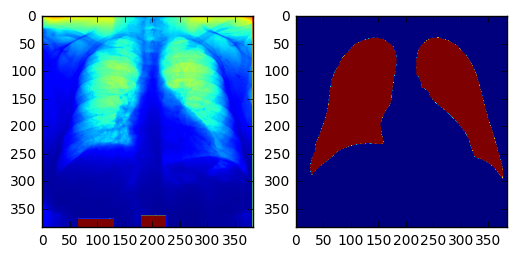

255.0 255.0


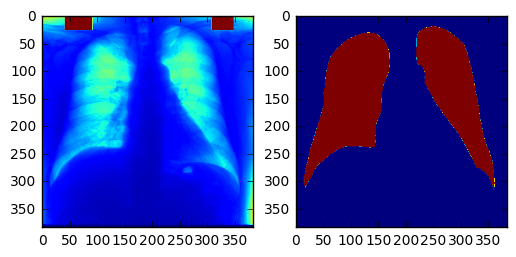

255.0 255.0


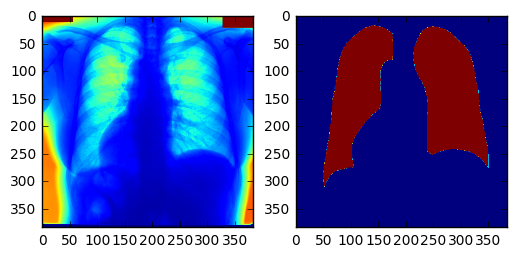

255.0 255.0


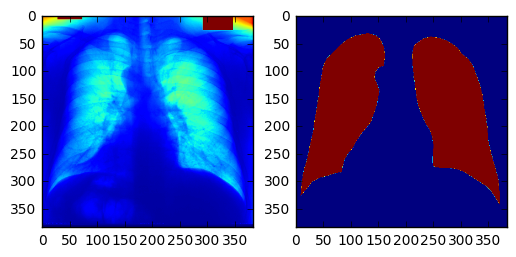

255.0 255.0


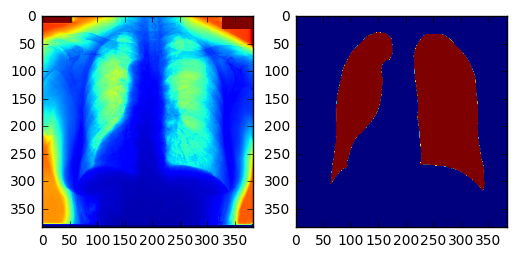

255.0 255.0


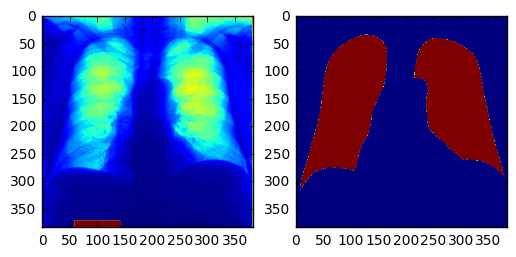

255.0 255.0


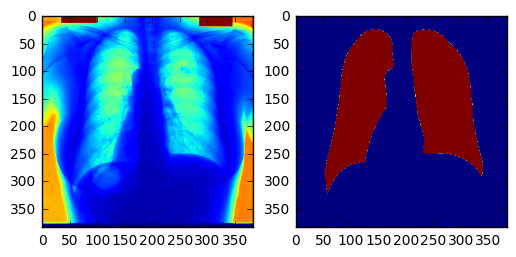

255.0 255.0


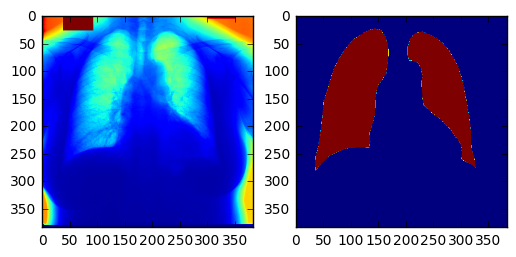

255.0 255.0


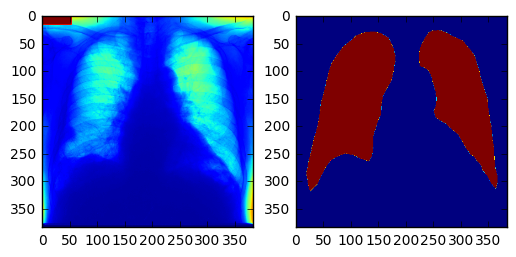

255.0 255.0


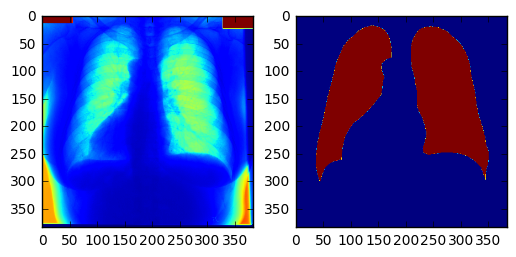

235.001 255.0


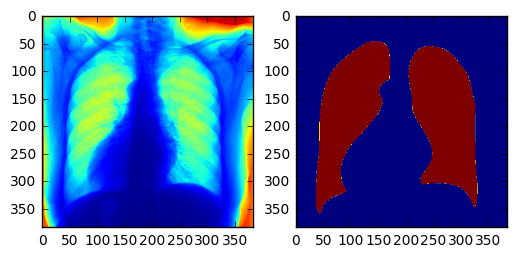

255.0 255.0


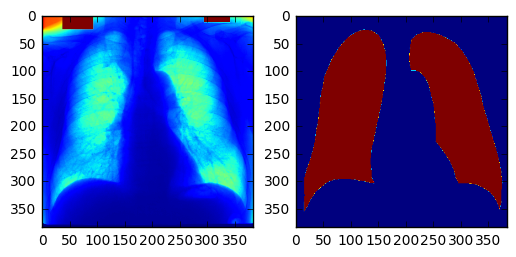

255.0 255.0


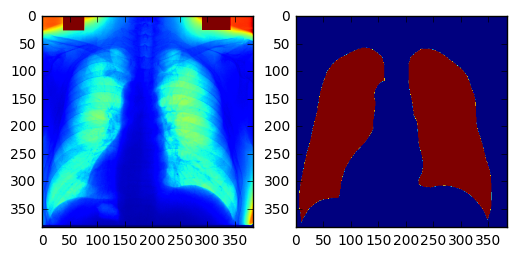

255.0 255.0


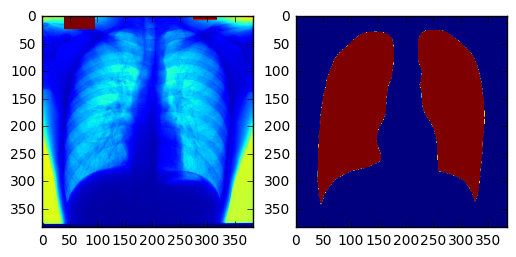

255.0 255.0


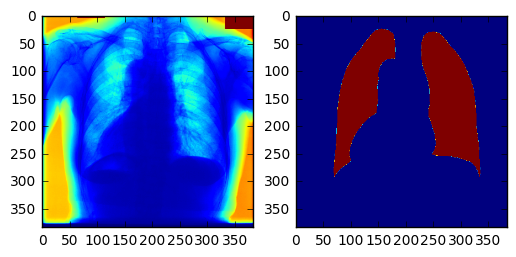

255.0 255.0


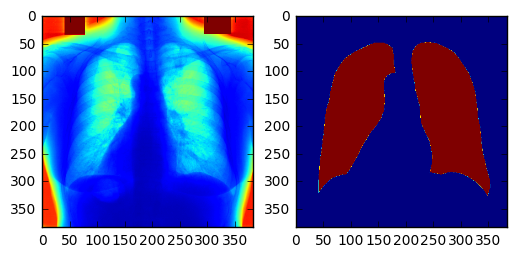

csv_read ok


In [9]:
# #decode tfrecord
# def read_and_decode(tfrecords_filename,if_aug,new_height,new_width,batch_size):
#     # always queue the file name 
#     filename_queue = tf.train.string_input_producer([tfrecords_filename])
#     reader = tf.TFRecordReader()
#     key, serialized_example = reader.read(filename_queue)

#     features = tf.parse_single_example(
#       serialized_example,
#       # Defaults are not specified since both keys are required.
#       features={
#         'height': tf.FixedLenFeature([], tf.int64),
#         'width': tf.FixedLenFeature([], tf.int64),
#         'image_raw': tf.FixedLenFeature([], tf.string),
#         'mask_raw': tf.FixedLenFeature([], tf.string)
#         })

#     image = tf.decode_raw(features['image_raw'], tf.uint8)
#     annotation = tf.decode_raw(features['mask_raw'], tf.uint8)

#     height = tf.cast(features['height'], tf.int32)
#     width = tf.cast(features['width'], tf.int32)

#     image_shape = [height, width, 1]
#     annotation_shape = [height, width, 1]
#     #1D to 3D 
#     image = tf.reshape(image,image_shape)
#     annotation = tf.reshape(annotation, annotation_shape)
#     # add fake color 
# #     image=tf.image.grayscale_to_rgb(image)

#     resized_image = tf.image.resize_images(image,
#                                            [new_height,new_width])
    
#     resized_annotation = tf.image.resize_images(annotation,
#                                            [new_height,new_width])
#     # if augment the image and mask
#     if if_aug:
#         # random flip
#         resized_image=tf.image.random_flip_left_right(resized_image,seed=1)
#         resized_annotation=tf.image.random_flip_left_right(resized_annotation,seed=1)
# #         # random contrast
# #         resized_image=tf.image.random_contrast(resized_image,seed=2,lower=0.1,upper=0.9)
# #         resized_annotation=tf.image.random_contrast(resized_annotation,seed=2,lower=0.1,upper=0.9)
        

#     images, annotations = tf.train.shuffle_batch( [resized_image, resized_annotation],
#                                                  batch_size=batch_size,
#                                                  capacity=30,
#                                                  num_threads=2,
#                                                  min_after_dequeue=10)

#     return images, annotations

# # visualize if the binary is ok

# tfrecords_filename = './fengkai/lung_training.tfrecords'
# img_batch_op,mask_batch_op=read_and_decode(tfrecords_filename,if_aug=True,new_height=384,new_width=384,batch_size=2)


# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# session = tf.Session(config=config)
# with session as sess:
#     # Start populating the filename queue.
#     coord = tf.train.Coordinator()
#     threads = tf.train.start_queue_runners(coord=coord)
#     sess.run(tf.global_variables_initializer())
    
#     for iter in range(0,200,2):
#         img_batch,mask_batch=sess.run([img_batch_op,mask_batch_op])
#         # plot to see the result match
#         print(np.max(img_batch[0,:,:,0]),np.max(mask_batch[0,:,:,0]))
#         plt.subplot(121)
#         plt.imshow(img_batch[0,:,:,0])
#         plt.subplot(122)
# #         print(mask_batch.shape)
#         plt.imshow(mask_batch[0,:,:,0])
#         plt.show()


#     print('csv_read ok')
#     coord.request_stop()
#     coord.join(threads) 

In [16]:
#decode tfrecord
def read_and_decode(tfrecords_filename,if_aug,new_height,new_width,batch_size):
    # always queue the file name 
    filename_queue = tf.train.string_input_producer([tfrecords_filename])
    reader = tf.TFRecordReader()
    key, serialized_example = reader.read(filename_queue)

    features = tf.parse_single_example(
      serialized_example,
      # Defaults are not specified since both keys are required.
      features={
        'height': tf.FixedLenFeature([], tf.int64),
        'width': tf.FixedLenFeature([], tf.int64),
        'image_raw': tf.FixedLenFeature([], tf.string),
        'mask_raw': tf.FixedLenFeature([], tf.string)
        })

    image = tf.decode_raw(features['image_raw'], tf.uint8)
    annotation = tf.decode_raw(features['mask_raw'], tf.uint8)

    height = tf.cast(features['height'], tf.int32)
    width = tf.cast(features['width'], tf.int32)

    image_shape = [height, width, 1]
    annotation_shape = [height, width, 1]
    #1D to 3D 
    image = tf.reshape(image,image_shape)
    annotation = tf.reshape(annotation, annotation_shape)
    # add fake color 
#     image=tf.image.grayscale_to_rgb(image)

    resized_image = tf.image.resize_images(image,
                                           [new_height,new_width])
    
    resized_annotation = tf.image.resize_images(annotation,
                                           [new_height,new_width])
    # if augment the image and mask
    if if_aug:
#         # random flip
#         resized_image=tf.image.random_flip_left_right(resized_image,seed=1)
#         resized_annotation=tf.image.random_flip_left_right(resized_annotation,seed=1)
        # random contrast
        resized_image=tf.image.random_contrast(resized_image,seed=2,lower=0.1,upper=0.9)
        resized_annotation=tf.image.random_contrast(resized_annotation,seed=2,lower=0.1,upper=0.9)
        

    images, annotations = tf.train.shuffle_batch( [resized_image, resized_annotation],
                                                 batch_size=batch_size,
                                                 capacity=30,
                                                 num_threads=2,
                                                 min_after_dequeue=10)

    return images, annotations

In [17]:
# layer U-net
def conv_conv_pool(input_, n_filters, training, name, pool=True, activation=tf.nn.relu):
    """{Conv -> BN -> RELU}x2 -> {Pool, optional}
    Args:
        input_ (4-D Tensor): (batch_size, H, W, C)
        n_filters (list): number of filters [int, int]
        training (1-D Tensor): Boolean Tensor
        name (str): name postfix
        pool (bool): If True, MaxPool2D
        activation: Activaion functions
    Returns:
        net: output of the Convolution operations
        pool (optional): output of the max pooling operations
    """
    net = input_

    with tf.variable_scope("layer{}".format(name)):
        for i, F in enumerate(n_filters):
            net = tf.layers.conv2d(net, F, (3, 3), activation=None, padding='same', name="conv_{}".format(i + 1))
            net = tf.layers.batch_normalization(net, training=training, name="bn_{}".format(i + 1))
            net = activation(net, name="relu{}_{}".format(name, i + 1))

        if pool is False:
            return net

        pool = tf.layers.max_pooling2d(net, (2, 2), strides=(2, 2), name="pool_{}".format(name))

        return net, pool


def upsample_concat(inputA, input_B, name):
    """Upsample `inputA` and concat with `input_B`
    Args:
        input_A (4-D Tensor): (N, H, W, C)
        input_B (4-D Tensor): (N, 2*H, 2*H, C2)
        name (str): name of the concat operation
    Returns:
        output (4-D Tensor): (N, 2*H, 2*W, C + C2)
    """
    upsample = upsampling_2D(inputA, size=(2, 2), name=name)

    return tf.concat([upsample, input_B], axis=-1, name="concat_{}".format(name))


def upsampling_2D(tensor, name, size=(2, 2)):
    """Upsample/Rescale `tensor` by size
    Args:
        tensor (4-D Tensor): (N, H, W, C)
        name (str): name of upsampling operations
        size (tuple, optional): (height_multiplier, width_multiplier)
            (default: (2, 2))
    Returns:
        output (4-D Tensor): (N, h_multiplier * H, w_multiplier * W, C)
    """
    H, W, _ = tensor.get_shape().as_list()[1:]

    H_multi, W_multi = size
    target_H = H * H_multi
    target_W = W * W_multi

    return tf.image.resize_nearest_neighbor(tensor, (target_H, target_W), name="upsample_{}".format(name))


def make_unet(X, training):
    """Build a U-Net architecture
    Args:
        X (4-D Tensor): (N, H, W, C)
        training (1-D Tensor): Boolean Tensor is required for batchnormalization layers
    Returns:
        output (4-D Tensor): (N, H, W, C)
            Same shape as the `input` tensor
    Notes:
        U-Net: Convolutional Networks for Biomedical Image Segmentation
        https://arxiv.org/abs/1505.04597
    """
    net = X/127.5 -1
    net = tf.layers.conv2d(net, 3, (1, 1), name="color_space_adjust")
    conv1, pool1 = conv_conv_pool(net, [8, 8], training, name=1)
    conv2, pool2 = conv_conv_pool(pool1, [16, 16], training, name=2)
    conv3, pool3 = conv_conv_pool(pool2, [32, 32], training, name=3)
    conv4, pool4 = conv_conv_pool(pool3, [64, 64], training, name=4)
    conv5 = conv_conv_pool(pool4, [128, 128], training, name=5, pool=False)

    up6 = upsample_concat(conv5, conv4, name=6)
    conv6 = conv_conv_pool(up6, [64, 64], training, name=6, pool=False)

    up7 = upsample_concat(conv6, conv3, name=7)
    conv7 = conv_conv_pool(up7, [32, 32], training, name=7, pool=False)

    up8 = upsample_concat(conv7, conv2, name=8)
    conv8 = conv_conv_pool(up8, [16, 16], training, name=8, pool=False)

    up9 = upsample_concat(conv8, conv1, name=9)
    conv9 = conv_conv_pool(up9, [8, 8], training, name=9, pool=False)

    return tf.layers.conv2d(conv9, 1, (1, 1), name='final', activation=tf.nn.sigmoid, padding='same')



In [18]:
# loss define and train op
def IOU_(y_pred, y_true):
    """Returns a (approx) IOU score
    intesection = y_pred.flatten() * y_true.flatten()
    Then, IOU = 2 * intersection / (y_pred.sum() + y_true.sum() + 1e-7) + 1e-7
    Args:
        y_pred (4-D array): (N, H, W, 1)
        y_true (4-D array): (N, H, W, 1)
    Returns:
        float: IOU score
    """
    H, W, _ = y_pred.get_shape().as_list()[1:]

    pred_flat = tf.reshape(y_pred, [-1, H * W])
    true_flat = tf.reshape(y_true, [-1, H * W])

    #to 0-1
    pred_flat=pred_flat/tf.reduce_max(pred_flat)
    true_flat=true_flat/tf.reduce_max(true_flat)
    intersection =  2*tf.reduce_sum(pred_flat * true_flat, axis=1) + 1e-7
    denominator = tf.reduce_sum(pred_flat, axis=1) + tf.reduce_sum(true_flat, axis=1) + 1e-7

    return tf.reduce_mean(intersection / denominator)


def make_train_op(y_pred, y_true):
    """Returns a training operation
    Loss function = - IOU(y_pred, y_true)
    IOU is
        (the area of intersection)
        --------------------------
        (the area of two boxes)
    Args:
        y_pred (4-D Tensor): (N, H, W, 1)
        y_true (4-D Tensor): (N, H, W, 1)
    Returns:
        train_op: minimize operation
    """
    loss =-IOU_(y_pred, y_true)

    global_step = tf.train.get_or_create_global_step()

    optim = tf.train.AdamOptimizer()
    return optim.minimize(loss, global_step=global_step)


In [ ]:
import time
logdir='./fengkai/Unet'
ckdir ='./fengkai/Unetmodel'
if not os.path.exists(logdir):
    os.mkdir(logdir)

current_time = time.strftime("%m/%d/%H/%M/%S")
train_logdir = os.path.join(logdir, "train", current_time)
test_logdir = os.path.join(logdir, "test", current_time)
# parameter setting
n_train=200
n_test=47
new_height=512
new_width=new_height
epochs=50
batch_size=8
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=[None, new_width, new_height, 1], name="X")
y = tf.placeholder(tf.float32, shape=[None, new_width, new_height, 1], name="y")
mode = tf.placeholder(tf.bool, name="mode")

pred = make_unet(X, mode)
tf.add_to_collection("inputs", X)
tf.add_to_collection("inputs", mode)
tf.add_to_collection("outputs", pred)

tf.summary.histogram("Predicted_Mask", pred)
tf.summary.image("Predicted_Mask", pred)

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.control_dependencies(update_ops):
    train_op = make_train_op(pred, y)

IOU_op = IOU_(pred, y)
IOU_op = tf.Print(IOU_op, [IOU_op])
tf.summary.scalar("IOU", IOU_op)
#train image mask batch op
train_tfrecords_filename = './fengkai/lung_training.tfrecords'
train_img_batch_op,train_mask_batch_op=read_and_decode(train_tfrecords_filename,if_aug=True,new_height=new_height,new_width=new_width,batch_size=batch_size)
#test image mask batch op
test_tfrecords_filename = './fengkai/lung_testing.tfrecords'
test_img_batch_op,test_mask_batch_op=read_and_decode(test_tfrecords_filename,if_aug=False,new_height=new_height,new_width=new_width,batch_size=batch_size)

summary_op = tf.summary.merge_all()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
with session as sess:
    # Start populating the filename queue.
    train_summary_writer = tf.summary.FileWriter(train_logdir, sess.graph)
    test_summary_writer = tf.summary.FileWriter(test_logdir)

#     coord = tf.train.Coordinator()
#     threads = tf.train.start_queue_runners(coord=coord)
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    if os.path.exists(ckdir) and tf.train.checkpoint_exists(ckdir):
        latest_check_point = tf.train.latest_checkpoint(ckdir)
        saver.restore(sess, latest_check_point)

    else:
        try:
            os.rmdir(ckdir)
        except FileNotFoundError:
            pass
        os.mkdir(ckdir)


    try:
        global_step = tf.train.get_global_step(sess.graph)

        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(coord=coord)

        for epoch in range(epochs):
            train_iou=0
            for step in range(0, n_train, batch_size):

                X_batch, y_batch = sess.run([train_img_batch_op,train_mask_batch_op])

                _, step_iou, step_summary, global_step_value = sess.run(
                    [train_op, IOU_op, summary_op, global_step],
                    feed_dict={X: X_batch,
                               y: y_batch,
                               mode: True})
#                 train_iou += step_iou * X_batch.shape[0]
            
                train_summary_writer.add_summary(step_summary, global_step_value)
            train_iou=step_iou
            total_iou = 0
            for step in range(0, n_test, batch_size):
                X_test, y_test = sess.run([test_img_batch_op,test_mask_batch_op])
                step_iou, step_summary = sess.run(
                    [IOU_op, summary_op],
                    feed_dict={X: X_test,
                               y: y_test,
                               mode: False})
            
#                 total_iou += step_iou * X_test.shape[0]

                test_summary_writer.add_summary(step_summary, (epoch + 1) * (step + 1))
    
            total_iou= step_iou
            print("epoch :{},IOU for training is {} for test  is {} ".format(epoch,train_iou,total_iou))
        saver.save(sess, "{}/model.ckpt".format(ckdir))

    finally:
        coord.request_stop()
        coord.join(threads)
        saver.save(sess, "{}/model.ckpt".format(ckdir))


epoch :0,IOU for training is 0.5561089515686035 for test  is 0.4440126419067383 
epoch :1,IOU for training is 0.5877199172973633 for test  is 0.4887756109237671 
epoch :2,IOU for training is 0.5198230147361755 for test  is 0.4542699456214905 
epoch :3,IOU for training is 0.6067264676094055 for test  is 0.4454687833786011 
epoch :4,IOU for training is 0.6085607409477234 for test  is 0.45166587829589844 
epoch :5,IOU for training is 0.5996588468551636 for test  is 0.4070826768875122 
epoch :6,IOU for training is 0.6475602388381958 for test  is 0.4919336438179016 
epoch :7,IOU for training is 0.6248966455459595 for test  is 0.48850974440574646 
epoch :8,IOU for training is 0.6674509644508362 for test  is 0.4783269762992859 
epoch :9,IOU for training is 0.6494240760803223 for test  is 0.4748038053512573 
epoch :10,IOU for training is 0.6134800910949707 for test  is 0.510086715221405 
epoch :11,IOU for training is 0.6208115220069885 for test  is 0.48370569944381714 
epoch :12,IOU for traini